### Theoretical to experimental finidngs on E-E synapses

Previous experimental findings have supported the learning rule between major E-E synapses as depending linearly on pre- and non-linearly on post synaptic firing rate. Among all the models, BCM type learning rule and triplet learning rule has gained a lot attention and application among different models. Here we tried to answer several detailed question considering with the learning rule. 
1. What is the exact functional format that has detailed experimental support for plasticity between major E-E synapses?
2. What is the constraint/requirement on the function, including nonlinearty, negativity, and how this might influence the modeling?
3. What is the relationship between BCM-type learnin rule and independent component analysis?
3. What is the correct kernal to link the rates and time-based model for the majority of E-E synapses? 

#### 1. BCM learning rule and experimental support for major E-E synapses

BCM type of learning rule has been the most wildly received rate learning model for synaptic plasticity.
The detailed functional format is: 

$ \frac {dw_i}{dt} = \eta u_{i}v(v-\theta)$

And we could plot the 2d function as below


In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


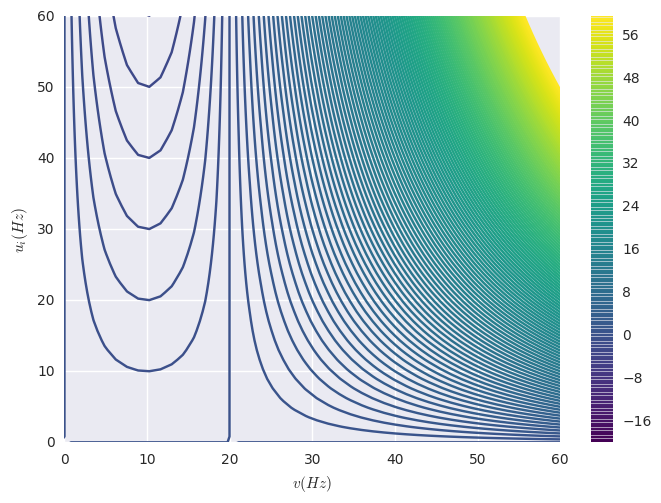

In [33]:
u = np.linspace(-10,800,600)
v = np.linspace(-10,800,600)
uvx,uvy = np.meshgrid(u,v)
uv = np.vstack((uvx.ravel(), uvy.ravel()))
dw = np.zeros(uv.shape[1])
for i in range(uv.shape[1]):
    dw[i] = 0.0005 * (uv[1, i]) * (uv[0, i]) * (uv[0, i]- 20)  
    dw_2d = dw.reshape(uvx.shape)


levels = np.arange(-20, 60, 0.5)
plt.contour(uvx, uvy,dw_2d, levels, cmap = plt.cm.get_cmap('viridis'))
plt.colorbar()
plt.ylabel('$u_{i}(Hz)$')
plt.xlabel('$v(Hz)$')
plt.xlim([0,60])
plt.ylim([0,60])
plt.savefig('BCM.pdf')

In [29]:
 dw

array([ -2.50000000e+00,  -2.10346682e+00,  -1.72521955e+00, ...,
         2.41515313e+05,   2.42356925e+05,   2.43200000e+05])

In [53]:
plt.savefig('BCM.pdf')

From the above function plot, we could see several key findings and validation points to take BCM learning rule as a good model for the E-E synapses:

1) Pre- and post- synaptic firing rates for plasticity to happen

2) Given the activity of pre-synaptic inputs, there's a threshold on post-synaptic activity that controls the sign of the plasticity

3) Should the function be truncated? What will happen if the firing rates becomes negative, which might be the case for inhibitory synapses

Given the case that we need to consider the relationship between membrane potential and the plasticity effect. We will consider a potential to firing rates model


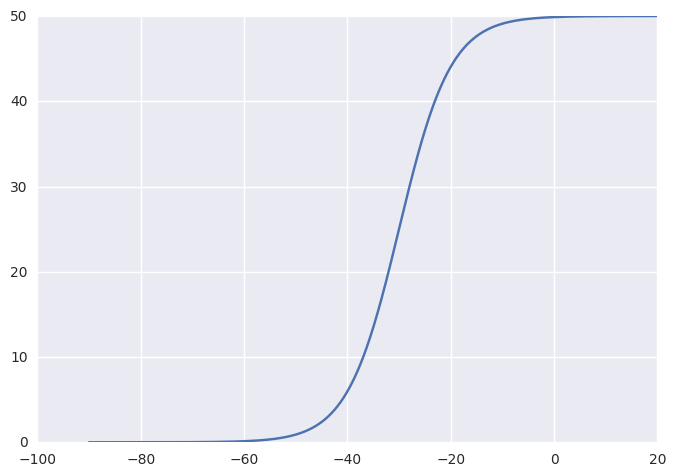

In [47]:
def sigmoid(z):
    return 50/(1+np.exp(-(z+30)/5))

u = np.linspace(-90,20,600)
v = np.linspace(-90,20,600)
ru = sigmoid(u)
rv = sigmoid(v)

plt.plot(u, ru)

uvx,uvy = np.meshgrid(u,v)
uv = np.vstack((uvx.ravel(), uvy.ravel()))
dw = np.zeros(uv.shape[1])
for i in range(uv.shape[1]):
    dw[i] = 0.0005 * (sigmoid(uv[1, i])) * (sigmoid(uv[0, i])) * (sigmoid(uv[0, i])- 20)
    dw_2d = dw.reshape(uvx.shape)


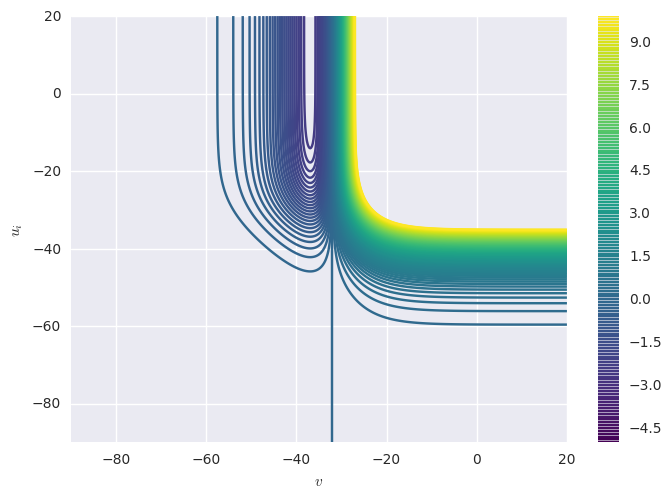

In [46]:
levels = np.arange(-5, 10, 0.1)
plt.figure()
plt.contour(uvx, uvy,dw_2d, levels, cmap = plt.cm.get_cmap('viridis'))
plt.colorbar()
plt.ylabel('$u_{i}$')
plt.xlabel('$v$')

In [ ]:
u = np.linspace(-90,0,600)
v = np.linspace(-90,0,600)
uvx,uvy = np.meshgrid(u,v)
uv = np.vstack((uvx.ravel(), uvy.ravel()))
dw = np.zeros(uv.shape[1])
for i in range(uv.shape[1]):
    dw[i] = 0.0005 * (uv[1, i]) * (uv[0, i]) * (uv[0, i]- 20)
    dw_2d = dw.reshape(uvx.shape)

levels = np.arange(-2, 4, 0.2)
plt.contour(uvx, uvy,dw_2d, levels, cmap = plt.cm.get_cmap('viridis'))
plt.colorbar()
plt.xlabel('$u_{i}$')
plt.ylabel('$v$')